<a href="https://colab.research.google.com/github/kelvinfoo123/MH3510-Regression-Analysis/blob/main/One_way_ANOVA_for_student's_exam_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

This dataset consists of student test score data for subjects including math, reading, and writing. The goal of this analysis is to determine correlation between the catergorical variables('gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course') and the test scores in math, reading, and writing.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import statsmodels.api as sm 
from statsmodels.formula.api import ols 

In [2]:
test = pd.read_csv("StudentsPerformance.csv")
test.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Shape of data 
test.shape

(1000, 8)

In [4]:
# Check for null values 
test.isnull().sum() # No null values 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# Summary of data 
test.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The scores in math, reading, and writing contain very similar averages.

## **Data visualization**

In [9]:
def visualization(data, variable):
  graph = sns.pairplot(data = data, hue = variable)
  graph.fig.suptitle('Graph showing distribution between scores and {}'.format(variable), fontsize = 20)
  graph.fig.subplots_adjust(top = 0.9)
  return graph  

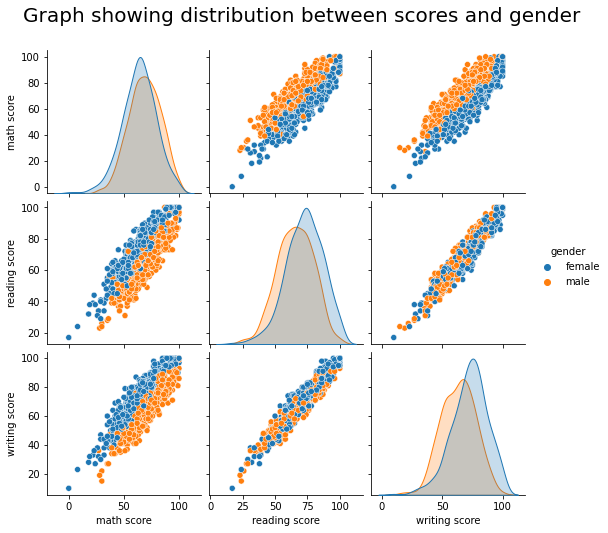

In [10]:
visualization(test, 'gender')

Females perform higher in reading and writing while males perform higher in math.

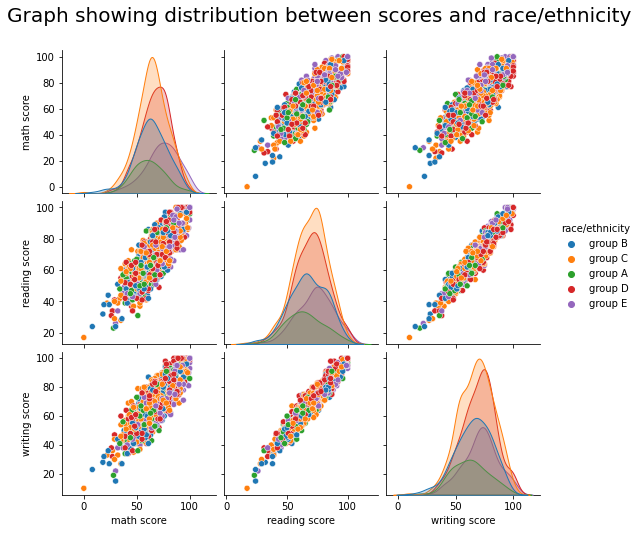

In [11]:
visualization(test, 'race/ethnicity')

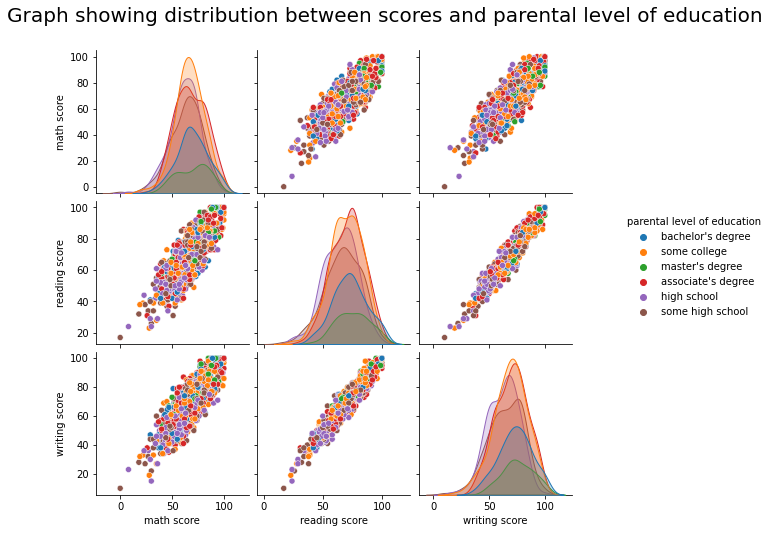

In [12]:
visualization(test, 'parental level of education')

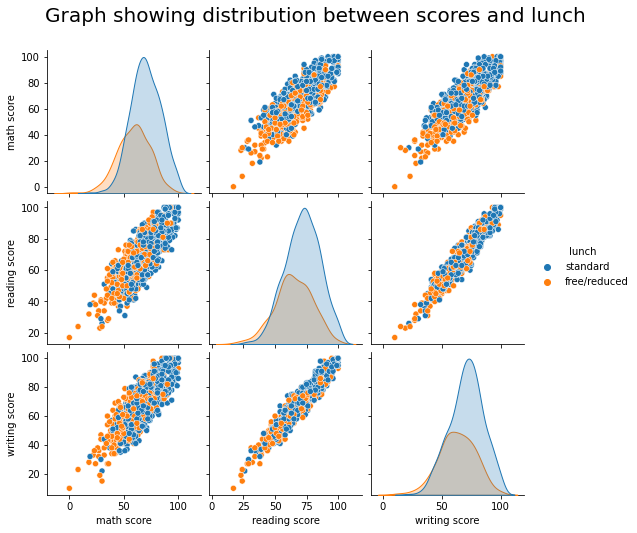

In [13]:
visualization(test, 'lunch')

Students who ate the standard lunch on average tested higher in all three subjects.



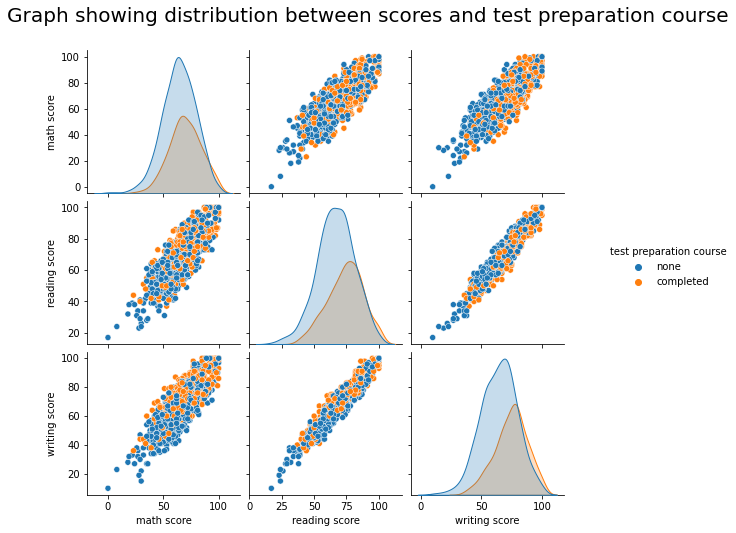

In [14]:
visualization(test, 'test preparation course')

## **One-way ANOVA test**

In [15]:
# Clean up column names 
test.columns = ['gender', 'race', 'parental_edu', 'lunch', 'test_prep_course', 'math_score', 'reading_score', 'writing_score']

In [17]:
def anova(data, variable): 
  x = ['math_score', 'reading_score', 'writing_score']
  for i,k in enumerate(x): 
    lm = ols('{} ~ {}'.format(x[i],variable), data = data).fit()
    table = sm.stats.anova_lm(lm)
    print("P-value for 1-way ANOVA test between {} and {} is ".format(x[i], variable), table.loc[variable, 'PR(>F)'])

In [19]:
# Gender ANOVA 
anova(test, 'gender')

P-value for 1-way ANOVA test between math_score and gender is  9.120185549333453e-08
P-value for 1-way ANOVA test between reading_score and gender is  4.680538743934009e-15
P-value for 1-way ANOVA test between writing_score and gender is  2.0198777068682407e-22


The p-values are below 0.05 indicating we can reject the null hypothesis. This confirmation shows us there is statistical correlation between test scores and gender.

In [20]:
anova(test, 'parental_edu')

P-value for 1-way ANOVA test between math_score and parental_edu is  5.592272384108375e-06
P-value for 1-way ANOVA test between reading_score and parental_edu is  1.1682457045709003e-08
P-value for 1-way ANOVA test between writing_score and parental_edu is  1.1202799969774331e-13


The p-values are below 0.05 indicating we can reject the null hypothesis. This confirmation shows us there is statistical correlation between test scores and parental education.

In [21]:
anova(test, 'lunch')

P-value for 1-way ANOVA test between math_score and lunch is  2.413195599315183e-30
P-value for 1-way ANOVA test between reading_score and lunch is  2.0027966545288553e-13
P-value for 1-way ANOVA test between writing_score and lunch is  3.1861895831680456e-15


The p-values are below 0.05 indicating we can reject the null hypothesis. This confirmation shows us there is statistical correlation between test scores and what the student ate for lunch.

In [22]:
anova(test, 'test_prep_course')

P-value for 1-way ANOVA test between math_score and test_prep_course is  1.5359134607155386e-08
P-value for 1-way ANOVA test between reading_score and test_prep_course is  9.081783336895556e-15
P-value for 1-way ANOVA test between writing_score and test_prep_course is  3.6852917352476696e-24


The p-values are below 0.05 indicating we can reject the null hypothesis. This confirmation shows us there is statistical correlation between test scores and what if the student completed a test preparation course.

**Summary:**
**The 1-way ANOVA test allows us to decide which variable to include in a regression model. We can ignore variables with no statistical correlation to the response variable.**